In [37]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

In [38]:
#look at the raw data files. For explanations, see Storm-Data-Export-Format.pdf in the data directory
sed = pd.read_csv('../data/StormEvents_details_2018.csv',delimiter=',')
sef = pd.read_csv('../data/StormEvents_fatalities_2018.csv',delimiter=',')

In [39]:
#show event details- note you don't see all columns and rows
sed

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201801,1,0,201801,31,2359,122564,733964,MISSOURI,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D2 (Severe) drought conditions continued acros...,NaN,CSV
1,201801,1,0,201801,31,2359,122564,733972,MISSOURI,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D2 (Severe) drought conditions continued acros...,NaN,CSV
2,201801,1,0,201801,31,2359,122568,733978,ILLINOIS,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D2 (Severe) drought continued across parts of ...,NaN,CSV
3,201801,1,0,201801,31,2359,122568,733979,ILLINOIS,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D2 (Severe) drought continued across parts of ...,NaN,CSV
4,201801,1,0,201801,31,2359,122564,733959,MISSOURI,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D2 (Severe) drought conditions continued acros...,NaN,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62346,201812,31,2230,201812,31,2359,132401,792342,CALIFORNIA,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An amplifying ridge over the Pacific and a dee...,Wind gusts around 50 mph at Grizzly Peak.,CSV
62347,201812,31,2300,201812,31,2359,133144,796632,OHIO,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A panhandle hook low pressure system moved nor...,An automated weather station at Akron-Canton R...,CSV
62348,201812,31,2300,201812,31,2359,133144,796626,OHIO,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A panhandle hook low pressure system moved nor...,An automated weather station at Cleveland Hopk...,CSV
62349,201812,31,2314,201812,31,2345,132251,791294,INDIANA,18,...,2.0,NNE,BROWNSVILLE,39.6944,-84.985,39.6935,-84.9837,A strong low pressure system brought moderate ...,Yankee Town bridge on Abington Road was closed...,CSV


In [40]:
# determine the number of events 
no_sed = len(sed)
print(no_sed)

62351


In [41]:
#what are the column labels
print(sed.columns)

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')


In [42]:
#what types of events have happened in 2018?
types_events = sed.EVENT_TYPE.unique()
print(types_events)

['Drought' 'Cold/Wind Chill' 'Flood' 'High Wind' 'Extreme Cold/Wind Chill'
 'Blizzard' 'Astronomical Low Tide' 'Frost/Freeze' 'Winter Weather'
 'Sleet' 'Lake-Effect Snow' 'Marine Thunderstorm Wind' 'Winter Storm'
 'Coastal Flood' 'Heavy Snow' 'High Surf' 'Marine High Wind' 'Flash Flood'
 'Dense Fog' 'Debris Flow' 'Strong Wind' 'Funnel Cloud' 'Heavy Rain'
 'Avalanche' 'Dust Storm' 'Hail' 'Thunderstorm Wind' 'Tornado'
 'Marine Strong Wind' 'Sneakerwave' 'Wildfire' 'Waterspout' 'Freezing Fog'
 'Storm Surge/Tide' 'Rip Current' 'Lightning' 'Ice Storm' 'Tropical Storm'
 'Marine Hail' 'Lakeshore Flood' 'Heat' 'Dust Devil' 'Volcanic Ashfall'
 'Marine Tropical Storm' 'Tropical Depression' 'Excessive Heat'
 'Dense Smoke' 'Seiche' 'Hurricane' 'Marine Tropical Depression'
 'Marine Hurricane/Typhoon']


In [43]:
#just trust me, this converts 1.00K to 1000, 1.50M to 1500000, etc.
sed.DAMAGE_PROPERTY = (sed.DAMAGE_PROPERTY.replace(r'[KMB]+$', '', regex=True).astype(float) * \
    sed.DAMAGE_PROPERTY.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6, 10**9]).astype(int))

In [44]:
sed.DAMAGE_CROPS = (sed.DAMAGE_CROPS.replace(r'[KMB]+$', '', regex=True).astype(float) * \
    sed.DAMAGE_CROPS.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6, 10**9]).astype(int))

In [45]:
#total $ losses
total_losses=sed.DAMAGE_PROPERTY.sum()+sed.DAMAGE_CROPS.sum()
print(total_losses)
# yowsa!

35000530290.0


In [46]:
# how many of these types of events have happened and how much damage have they caused?
#create new dataframe to hold summary statistics
events = pd.DataFrame(columns=["EVENT_TYPE", "NUMBER", "COST", "NUMBER_MIL", "COST_MIL"])

#loop over all types
for types in types_events:
    styp = str(types)
    #find the cases for this event type
    cases=sed[sed['EVENT_TYPE'].str.contains(styp)]
    #count all of the event types
    no_types=len(cases)
    #print(styp,no_types)
    #sum all the losses from these events
    cases_sum_prop=cases.loc[cases['DAMAGE_PROPERTY']>0,'DAMAGE_PROPERTY'].sum()
    cases_sum_crop=cases.loc[cases['DAMAGE_CROPS']>0,'DAMAGE_CROPS'].sum()
    cases_sum = cases_sum_prop+cases_sum_crop
    
    #count all the million dollar loss events
    casesm_prop = cases.loc[cases['DAMAGE_PROPERTY']>1000000,'DAMAGE_PROPERTY']
    casesm_crop = cases.loc[cases['DAMAGE_CROPS']>1000000,'DAMAGE_CROPS']
    #count and sum the losses from all the million dollar events
    no_propm = len(casesm_prop)
    no_cropm = len(casesm_crop)
    no_m = no_propm+no_cropm
    #print(styp,no_m)
    casesm_sum=casesm_prop.sum()+casesm_crop.sum()
    #append each type to the dataframe
    events = events.append({"EVENT_TYPE": styp,"NUMBER": no_types,"COST": cases_sum, \
                           "NUMBER_MIL": no_m, "COST_MIL": casesm_sum}, ignore_index=True)
events

,EVENT_TYPE,NUMBER,COST,NUMBER_MIL,COST_MIL
0,Drought,2417,1.090000e+05,0,0.000000e+00
1,Cold/Wind Chill,1172,0.000000e+00,0,0.000000e+00
2,Flood,9533,1.699556e+09,151,1.545190e+09
3,High Wind,2996,5.346100e+07,12,3.575000e+07
4,Extreme Cold/Wind Chill,590,0.000000e+00,0,0.000000e+00
5,Blizzard,761,3.527000e+06,0,0.000000e+00
6,Astronomical Low Tide,33,0.000000e+00,0,0.000000e+00
7,Frost/Freeze,710,1.500200e+08,3,1.500000e+08
8,Winter Weather,4570,5.235700e+06,0,0.000000e+00
9,Sleet,8,1.350000e+05,0,0.000000e+00


In [47]:
#Question 1. Do you think the cost of droughts during 2018 is really zero? 
#What other categories might be subject to lack of reporting and why?
#What surprises you in terms of the types of events, how many occurred, and how much they cost?

In [48]:
#what are the costliest types of events in 2018?
ev_cost_large=events.nlargest(10, 'COST')
print(ev_cost_large)

           EVENT_TYPE NUMBER          COST NUMBER_MIL      COST_MIL
30           Wildfire    417  1.884201e+10         22  1.883230e+10
48          Hurricane     66  1.052268e+10         54  1.052244e+10
2               Flood   9533  1.699556e+09        151  1.545190e+09
33   Storm Surge/Tide     26  1.050172e+09          4  1.050000e+09
25               Hail   7887  8.102175e+08         26  7.764500e+08
17        Flash Flood   4378  7.345914e+08         63  6.491600e+08
27            Tornado   1250  6.723222e+08         30  6.081600e+08
19        Debris Flow    136  6.197706e+08          1  6.170000e+08
37     Tropical Storm    359  3.126230e+08         12  2.814100e+08
26  Thunderstorm Wind  16710  1.560159e+08         18  6.910000e+07


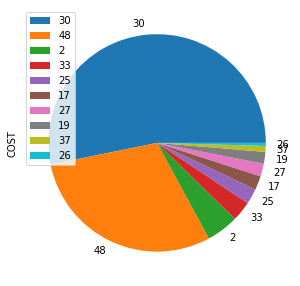

In [49]:
#crude pie plot of the costliest event categories
ev_cost_large.plot.pie(y='COST', figsize=(5, 5))

In [50]:
#show fatality details
sef

,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,201801,1,0,34680,727675,D,1/1/2018 0:00,27.0,F,Outside/Open Areas,201801.0
1,201801,1,0,35076,726052,D,1/1/2018 0:00,52.0,F,Outside/Open Areas,201801.0
2,201801,1,0,34619,726403,D,1/1/2018 0:00,49.0,M,Outside/Open Areas,201801.0
3,201801,1,0,34620,726404,D,1/1/2018 0:00,NaN,M,Outside/Open Areas,201801.0
4,201801,1,0,34989,731601,D,1/1/2018 0:00,55.0,M,Outside/Open Areas,201801.0
...,...,...,...,...,...,...,...,...,...,...,...
794,201812,30,0,37846,807380,I,12/30/2018 0:00,20.0,F,Vehicle/Towed Trailer,201812.0
795,201812,31,0,37293,791617,D,12/31/2018 0:00,63.0,F,Vehicle/Towed Trailer,201812.0
796,201812,31,0,36837,792067,I,12/31/2018 0:00,12.0,M,Vehicle/Towed Trailer,201812.0
797,201812,31,0,36821,792166,D,12/31/2018 0:00,NaN,M,Boating,201812.0


In [51]:
#fatality column headers
print(sef.columns)

Index(['FAT_YEARMONTH', 'FAT_DAY', 'FAT_TIME', 'FATALITY_ID', 'EVENT_ID',
       'FATALITY_TYPE', 'FATALITY_DATE', 'FATALITY_AGE', 'FATALITY_SEX',
       'FATALITY_LOCATION', 'EVENT_YEARMONTH'],
      dtype='object')


In [52]:
#number of fatalities
no_sef = len(sef)
print(no_sef)

799


In [53]:
#what types of locations have been where fatalities occurred?
types_locations = sef.FATALITY_LOCATION.unique()
print(types_locations)

['Outside/Open Areas' 'Vehicle/Towed Trailer' 'In Water' 'Unknown'
 'Permanent Structure' 'Permanent Home' 'Other' 'Mobile/Trailer Home'
 'Boating' 'Camping' 'Under Tree' 'Heavy Equipment/Construction'
 'Business']


In [54]:
#how many of these types of locations have happened and how many fatalities have occurrred for each?
#create new dataframe to hold summary statistics
fatalities = pd.DataFrame(columns=["FATALITY_LOCATION", "NUMBER"])
#how many of each location type have happened?
for types in types_locations:
    styp = str(types)
    #find the number of fatalities for this location type
    casesf=sef[sef['FATALITY_LOCATION'].str.contains(styp)]
    #count all of the event types
    no_types=len(casesf)
    #print(styp,no_typesf)
    #append each type to the dataframe
    fatalities = fatalities.append({"FATALITY_LOCATION": styp,"NUMBER": no_types}, ignore_index=True)
fatalities

,FATALITY_LOCATION,NUMBER
0,Outside/Open Areas,175
1,Vehicle/Towed Trailer,187
2,In Water,102
3,Unknown,152
4,Permanent Structure,10
5,Permanent Home,84
6,Other,10
7,Mobile/Trailer Home,10
8,Boating,28
9,Camping,10


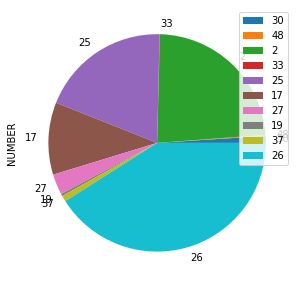

In [73]:
#Question 2. create a crude pie plot of the fatalities by location


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025498D41668>]],
      dtype=object)

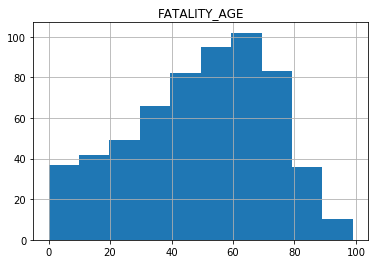

In [55]:
# Question 3. Use one line to crudely plot a histogram of the ages of the fatalities
# hint: dataframe.hist(column='...') 

# Followup Quesion- is the risk of dying higher for the young (under 30) or old (over 60) from a weather event?
#um, older

In [56]:
#combine the year,month,day into one variable
sef['DATE']=pd.to_datetime(sef.FAT_YEARMONTH*100 + sef.FAT_DAY,format='%Y%m%d')

In [57]:
#what days of the week did the fatalities happen?
sef['DOW']=sef.DATE.dt.dayofweek

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025496A316D8>]],
      dtype=object)

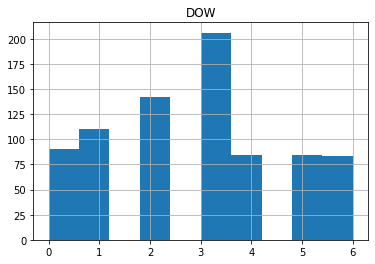

In [58]:
#for reference
day_labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
# Question 4. Use one line to crudely plot a histogram of the days of the week fatalities occurred
# hint: dataframe.hist(column='...') 

#Followup Question: is there any obvious reason for when during the week people are more at risk of dying?
#not really

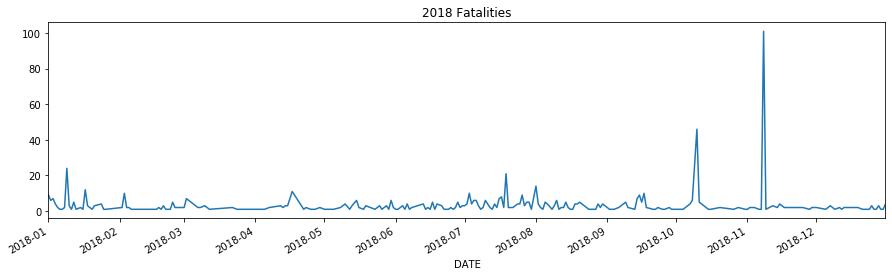

In [59]:
#group all by the date and then count how many are in each day
sef_dayc = sef.groupby(sef['DATE']).count()
#print(sef_dayc)
sef_dayc.FATALITY_TYPE.plot(figsize=(15,4),title='2018 Fatalities')

In [60]:
#Question 5. Use idxmax to determine the day, max_day_fa, with the max number of fatalities

#print(max_day_fa)
#Followup Question: what happened on this date to cause so many weather-related fatalities?

#sef.loc[sef['DATE'] == '...']

#Followup Question: how does this help explain the day of the week with the most weather-related fatalities?
#Camp fire was on a Thursday and also some winter weather elsewhere

2018-11-08 00:00:00
     FAT_YEARMONTH  FAT_DAY  FAT_TIME  FATALITY_ID  EVENT_ID FATALITY_TYPE  \
650         201811        8         0        37251    795857             D   
651         201811        8         0        37252    795857             D   
652         201811        8         0        37253    795857             D   
653         201811        8         0        37254    795858             D   
654         201811        8         0        37255    795858             D   
..             ...      ...       ...          ...       ...           ...   
746         201811        8         0        37631    788675             D   
747         201811        8         0        37642    788675             D   
748         201811        8         0        37576    788675             D   
749         201811        8         0        37609    788675             D   
750         201811        8         0        37641    788675             D   

      FATALITY_DATE  FATALITY_AGE FATALITY_

In [61]:
#Question 6. which types of locations were associated with the max fatalities on this day?
max_loc_fa = sef.FATALITY_LOCATION.loc[sef['DATE'] == max_day_fa]
max_loc_fa
#Followup question- why is so much info unknown/unavailable on this day?

650           Permanent Home
651    Vehicle/Towed Trailer
652    Vehicle/Towed Trailer
653           Permanent Home
654    Vehicle/Towed Trailer
               ...          
746                  Unknown
747                  Unknown
748                  Unknown
749                  Unknown
750                  Unknown
Name: FATALITY_LOCATION, Length: 101, dtype: object

In [62]:
#now process the events
sed['DATE']=pd.to_datetime(sed.BEGIN_YEARMONTH*100 + sed.BEGIN_DAY,format='%Y%m%d')

In [63]:
#Question 7. What types of events happened on this day?
#sed.....loc[... == max_day_fa]
#follow up question- are you getting a sense of what was the key weather event on max_day_fat?

56812    Winter Weather
56813    Winter Weather
56814              Hail
56815        Heavy Rain
56816          Wildfire
56817       Flash Flood
56818       Dense Smoke
56819       Dense Smoke
56820      Winter Storm
56821      Winter Storm
56822       Flash Flood
56823       Flash Flood
56824    Winter Weather
56825    Winter Weather
56826    Winter Weather
56827    Winter Weather
56828    Winter Weather
56829    Winter Weather
56830    Winter Weather
56831    Winter Weather
56832    Winter Weather
56833    Winter Weather
56834    Winter Weather
56835    Winter Weather
56836    Winter Weather
56837    Winter Weather
56838    Winter Weather
56839    Winter Weather
56840         High Wind
56841          Wildfire
56842          Wildfire
56843          Wildfire
56844          Wildfire
56845          Wildfire
56846          Wildfire
56847          Wildfire
56848        Heavy Rain
56849    Winter Weather
56850         High Wind
56851        Heavy Rain
56852         High Wind
56853       Flas

In [64]:
#now process the events
sed['DATE']=pd.to_datetime(sed.BEGIN_YEARMONTH*100 + sed.BEGIN_DAY,format='%Y%m%d')

In [65]:
#Question 8. Determine the days of the week for the events

#Followup code required. Group all events by the date and then count how many are in each day

#print(sed_dayc)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025496B7E668>]],
      dtype=object)

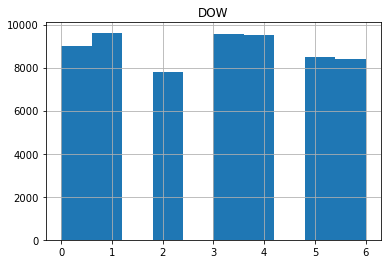

In [66]:
#Question 9. Use one line to crudely plot a histogram of the days of the week events occurred
# hint: dataframe.hist(column='...') 

#Followup Question: is there any obvious reason for when during the week events are more likely?
#not really

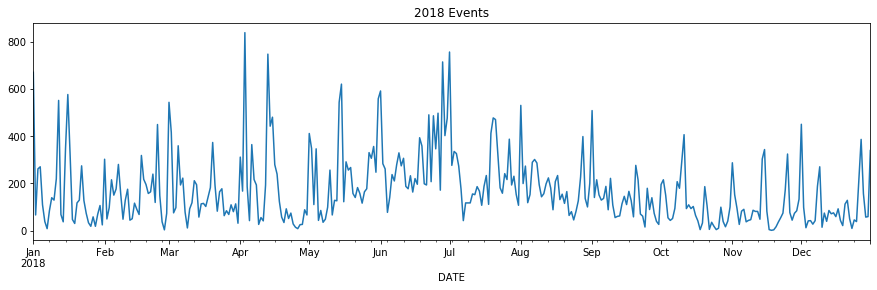

In [67]:
#Question 10. plot a time series of the events on each day during 2018


In [68]:
#Question 11. Use idxmax to determine the day, max_day_ev, with the max number of events

#Followup Question: what happened on this date to cause so many weather-related events?
#winter storm, tornadoes
#sef....loc[sef['DATE'] == '...']



2018-04-03 00:00:00


14613              Winter Weather
14614                Winter Storm
14615                Winter Storm
14616              Winter Weather
14617              Winter Weather
                   ...           
15446           Thunderstorm Wind
15447    Marine Thunderstorm Wind
15448           Thunderstorm Wind
15449           Thunderstorm Wind
15450                   High Wind
Name: EVENT_TYPE, Length: 838, dtype: object

In [69]:
#Question 12. what fraction are Utah events?
#start from 'define state_events=sed....to_string(index=...)'

#then count the state_events with the string 'UTAH'

#print(no_utah,no_utah/no_sed)

307 0.004923738191849369


In [70]:
#Question 13. Determine the fraction of the total number of fatalities 
#that were men who died directly or indirectly due to weather events

#print(no_men,no_men/no_sef)


472 0.590738423028786


In [71]:
#Question 14. There's a lot of data in these two files. Poke around and come up with something interesting to discuss!
#This question doesn't require you to write complicated code